In [1]:
from pybaseball import statcast
from pybaseball import statcast_batter
from pybaseball import playerid_lookup
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:
pid = playerid_lookup("arraez", "luis")["key_mlbam"][0]
print(pid)
data = statcast_batter("2019-03-29", "2019-10-30", player_id=pid)
data.head()

Gathering player lookup table. This may take a moment.
650333
Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,FF,2019-10-07,96.0,0.4982,6.1431,Luis Arraez,650333,547973,field_out,hit_into_play,NaN,NaN,NaN,NaN,3.0,Luis Arraez lines out sharply to right fielder...,D,L,L,MIN,NYY,X,9.0,line_drive,1,0,2019,0.6216,1.3851,0.4894,2.9552,NaN,NaN,NaN,1,8,Bot,173.76,93.96,NaN,NaN,596142,NaN,191008_040619,-1.4666,-139.7669,-6.0560,8.5791,33.1720,-12.6001,3.0175,1.4332,274.0,101.4,17.1,96.679,2547.0,6.769,599344,547973,596142,518934,650402,570482,544369,457727,458731,592450,53.7308,0.522,0.580,0.00,1.0,0.0,0.0,4.0,63,2,4-Seam Fastball,1,3,1,3,3,1,1,3,Standard,Standard
1,FF,2019-10-07,97.4,0.4674,6.2585,Luis Arraez,650333,547973,NaN,ball,NaN,NaN,NaN,NaN,12.0,NaN,D,L,L,MIN,NYY,B,NaN,NaN,0,0,2019,0.4169,1.4314,0.5245,3.6921,NaN,NaN,NaN,1,8,Bot,NaN,NaN,NaN,NaN,596142,NaN,191008_040551,-0.8229,-141.9345,-4.7284,5.8728,34.1313,-11.7609,2.9137,1.4131,NaN,NaN,NaN,98.015,2586.0,6.672,599344,547973,596142,518934,650402,570482,544369,457727,458731,592450,53.8274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,1,4-Seam Fastball,1,3,1,3,3,1,1,3,Standard,Standard
2,FF,2019-10-07,96.3,-2.3471,5.9640,Luis Arraez,650333,643338,double,hit_into_play_no_out,NaN,NaN,NaN,NaN,11.0,Luis Arraez doubles (4) on a line drive to cen...,D,L,R,MIN,NYY,X,8.0,line_drive,2,2,2019,-0.5516,1.2511,-0.7879,3.1206,NaN,NaN,NaN,1,6,Bot,73.00,68.86,NaN,NaN,596142,NaN,191008_030954,5.4014,-140.1589,-4.8551,-8.4525,29.5602,-14.7608,2.9801,1.4042,332.0,98.0,18.5,96.750,2468.0,6.386,599344,643338,596142,518934,650402,570482,544369,519317,458731,592450,54.1138,0.385,0.448,1.25,1.0,1.0,1.0,4.0,47,6,4-Seam Fastball,0,2,0,2,2,0,0,2,Standard,Standard
3,SL,2019-10-07,85.8,-2.2394,6.0542,Luis Arraez,650333,643338,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,D,L,R,MIN,NYY,B,NaN,NaN,1,2,2019,0.4775,-0.1137,1.3716,1.8647,NaN,NaN,NaN,1,6,Bot,NaN,NaN,NaN,NaN,596142,NaN,191008_030930,7.5716,-124.8134,-3.4959,3.7180,21.5348,-32.9558,2.9822,1.3787,NaN,NaN,NaN,86.199,2235.0,6.245,599344,643338,596142,518934,650402,570482,544369,519317,458731,592450,54.2547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,5,Slider,0,2,0,2,2,0,0,2,Standard,Standard
4,FF,2019-10-07,97.6,-2.0221,6.1194,Luis Arraez,650333,643338,NaN,foul,NaN,NaN,NaN,NaN,11.0,NaN,D,L,R,MIN,NYY,S,NaN,NaN,1,2,2019,-0.5206,1.5047,-0.2910,3.2390,NaN,NaN,NaN,1,6,Bot,NaN,NaN,NaN,NaN,596142,NaN,191008_030907,5.8537,-141.9914,-5.7157,-8.3452,31.4175,-10.7408,2.9320,1.3822,NaN,NaN,NaN,97.764,2541.0,6.319,599344,643338,596142,518934,650402,570482,544369,519317,458731,592450,54.1809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,4,4-Seam Fastball,0,2,0,2,2,0,0,2,Standard,Standard


In [3]:
data = data[["pitch_type", "bat_score", "fld_score", "on_3b", "on_2b", "on_1b", "outs_when_up", "inning", "pitch_number", "p_throws", "balls", "strikes", "stand", "release_speed", "events"]]
data.head()

,pitch_type,bat_score,fld_score,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,p_throws,balls,strikes,stand,release_speed,events
0,FF,1,3,NaN,NaN,NaN,1,8,2,L,1,0,L,96.0,field_out
1,FF,1,3,NaN,NaN,NaN,1,8,1,L,0,0,L,97.4,NaN
2,FF,0,2,NaN,NaN,NaN,1,6,6,R,2,2,L,96.3,double
3,SL,0,2,NaN,NaN,NaN,1,6,5,R,1,2,L,85.8,NaN
4,FF,0,2,NaN,NaN,NaN,1,6,4,R,1,2,L,97.6,NaN


In [4]:
data = data[data.pitch_type != 'EP']
data = data[data.pitch_type != 'PO']
data[["on_3b", "on_2b", "on_1b"]] = data[["on_3b", "on_2b", "on_1b"]].replace(np.nan, 0)
data.loc[data.on_3b > 0, "on_3b"] = 1
data.loc[data.on_2b > 0, "on_2b"] = 1
data.loc[data.on_1b > 0, "on_1b"] = 1
#data = data.dropna()

In [5]:
data.head()

,pitch_type,bat_score,fld_score,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,p_throws,balls,strikes,stand,release_speed,events
0,FF,1,3,0.0,0.0,0.0,1,8,2,L,1,0,L,96.0,field_out
1,FF,1,3,0.0,0.0,0.0,1,8,1,L,0,0,L,97.4,NaN
2,FF,0,2,0.0,0.0,0.0,1,6,6,R,2,2,L,96.3,double
3,SL,0,2,0.0,0.0,0.0,1,6,5,R,1,2,L,85.8,NaN
4,FF,0,2,0.0,0.0,0.0,1,6,4,R,1,2,L,97.6,NaN


In [6]:
data.tail()

,pitch_type,bat_score,fld_score,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,p_throws,balls,strikes,stand,release_speed,events
1525,SI,17,4,0.0,0.0,0.0,1,8,1,R,0,0,L,90.5,double
1526,FF,15,4,0.0,0.0,1.0,0,6,4,R,1,2,L,92.6,field_out
1527,FF,15,4,0.0,0.0,1.0,0,6,3,R,1,1,L,92.0,NaN
1528,CU,15,4,0.0,0.0,1.0,0,6,2,R,0,1,L,78.8,NaN
1529,FF,15,4,0.0,0.0,1.0,0,6,1,R,0,0,L,92.8,NaN


In [7]:
data["events"].value_counts()

field_out                     177
single                         85
walk                           35
strikeout                      30
double                         24
force_out                      11
home_run                        4
sac_fly                         3
grounded_into_double_play       3
fielders_choice_out             1
pickoff_caught_stealing_2b      1
strikeout_double_play           1
hit_by_pitch                    1
triple                          1
Name: events, dtype: int64

In [8]:
data = pd.concat([data,pd.get_dummies(data["p_throws"], prefix='pitcher_throws')],axis=1)
data = pd.concat([data,pd.get_dummies(data["stand"], prefix='batter_stands')],axis=1)
data = pd.concat([data,pd.get_dummies(data["pitch_type"], prefix='p_type')],axis=1)
data.head()

,pitch_type,bat_score,fld_score,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,p_throws,balls,strikes,stand,release_speed,events,pitcher_throws_L,pitcher_throws_R,batter_stands_L,p_type_CH,p_type_CU,p_type_FC,p_type_FF,p_type_FS,p_type_FT,p_type_SI,p_type_SL
0,FF,1,3,0.0,0.0,0.0,1,8,2,L,1,0,L,96.0,field_out,1,0,1,0,0,0,1,0,0,0,0
2,FF,0,2,0.0,0.0,0.0,1,6,6,R,2,2,L,96.3,double,0,1,1,0,0,0,1,0,0,0,0
8,FF,0,2,0.0,0.0,0.0,0,4,3,R,0,2,L,94.8,field_out,0,1,1,0,0,0,1,0,0,0,0
11,FF,0,1,0.0,1.0,1.0,0,2,3,R,1,1,L,97.6,single,0,1,1,0,0,0,1,0,0,0,0
14,CH,1,8,0.0,0.0,1.0,2,9,4,R,2,1,L,88.8,double,0,1,1,1,0,0,0,0,0,0,0


In [9]:
data = data.drop(['pitch_type', 'p_throws', 'stand'], axis=1)
data.head()

,bat_score,fld_score,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,balls,strikes,release_speed,events,pitcher_throws_L,pitcher_throws_R,batter_stands_L,p_type_CH,p_type_CU,p_type_FC,p_type_FF,p_type_FS,p_type_FT,p_type_SI,p_type_SL
0,1,3,0.0,0.0,0.0,1,8,2,1,0,96.0,field_out,1,0,1,0,0,0,1,0,0,0,0
2,0,2,0.0,0.0,0.0,1,6,6,2,2,96.3,double,0,1,1,0,0,0,1,0,0,0,0
8,0,2,0.0,0.0,0.0,0,4,3,0,2,94.8,field_out,0,1,1,0,0,0,1,0,0,0,0
11,0,1,0.0,1.0,1.0,0,2,3,1,1,97.6,single,0,1,1,0,0,0,1,0,0,0,0
14,1,8,0.0,0.0,1.0,2,9,4,2,1,88.8,double,0,1,1,1,0,0,0,0,0,0,0


In [10]:
categoricalMask = data.dtypes==object
categoricalCols = data.columns[categoricalMask].tolist()
categoricalCols

['events']

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data[categoricalCols] = data[categoricalCols].apply(lambda col : le.fit_transform(col))
data = data.sample(frac=1).reset_index(drop=True)

In [22]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

features = data.drop("events", 1).columns.tolist()
X = data[features]
y = data["events"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

In [23]:
print(features)

['bat_score', 'fld_score', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'pitch_number', 'balls', 'strikes', 'release_speed', 'pitcher_throws_L', 'pitcher_throws_R', 'batter_stands_L', 'p_type_CH', 'p_type_CU', 'p_type_FC', 'p_type_FF', 'p_type_FS', 'p_type_FT', 'p_type_SI', 'p_type_SL']


In [24]:
from keras.utils import to_categorical
num_classes=len(data["events"].unique())
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [47]:
from tensorflow import feature_column
from tensorflow.keras import layers
import tensorflow as tf


def get_compiled_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(len(features),), activation='relu', name='fc1'), #layer 1
    tf.keras.layers.Dense(128, activation='relu', name='fc2'), #layer 2
    tf.keras.layers.Dense(16, activation='relu', name='fc3'), #layer 2
    tf.keras.layers.Dense(num_classes, activation='softmax', name='output')
  ])

  model.compile(optimizer='adam', 
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

model = get_compiled_model()
model.fit(X_train, y_train, batch_size=5, epochs=200)

=============] - 0s 310us/sample - loss: 0.1750 - acc: 0.9310
Epoch 10/200
299/299 [==============================] - 0s 336us/sample - loss: 0.1734 - acc: 0.9333
Epoch 11/200
299/299 [==============================] - 0s 306us/sample - loss: 0.1728 - acc: 0.9324
Epoch 12/200
299/299 [==============================] - 0s 318us/sample - loss: 0.1742 - acc: 0.9281
Epoch 13/200
299/299 [==============================] - 0s 313us/sample - loss: 0.1729 - acc: 0.9310
Epoch 14/200
299/299 [==============================] - 0s 368us/sample - loss: 0.1717 - acc: 0.9305
Epoch 15/200
299/299 [==============================] - 0s 340us/sample - loss: 0.1702 - acc: 0.9326
Epoch 16/200
299/299 [==============================] - 0s 323us/sample - loss: 0.1697 - acc: 0.9343
Epoch 17/200
299/299 [==============================] - 0s 362us/sample - loss: 0.1697 - acc: 0.9345
Epoch 18/200
299/299 [==============================] - 0s 336us/sample - loss: 0.1703 - acc: 0.9341
Epoch 19/200
299/299 [=======

In [48]:
results = model.evaluate(X_test, y_test)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

75/75 [==============================] - 0s 432us/sample - loss: 0.2180 - acc: 0.9333
Final test set loss: 0.218032
Final test set accuracy: 0.933333


In [49]:
events = le.inverse_transform(data["events"].unique())
events

array(['single', 'field_out', 'walk', 'double', 'strikeout', 'force_out',
       'strikeout_double_play', 'grounded_into_double_play',
       'fielders_choice_out', 'sac_fly', 'triple', 'home_run',
       'hit_by_pitch', 'pickoff_caught_stealing_2b'], dtype=object)

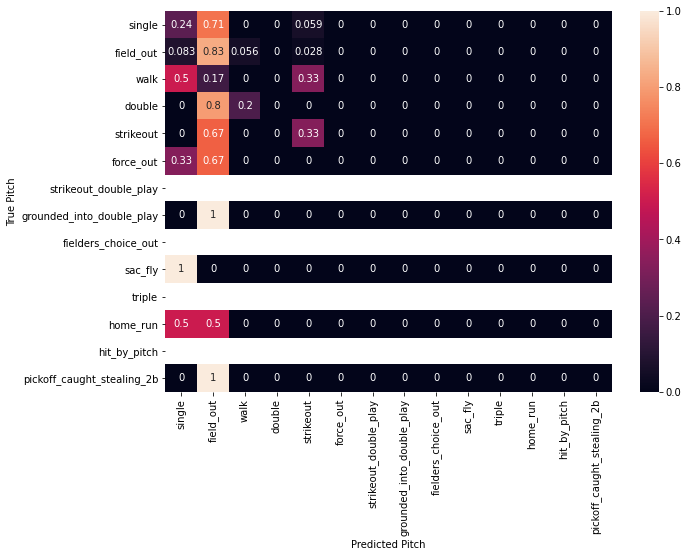

In [50]:
actual = [np.argmax(y, axis=None, out=None) for y in y_test]

y_pred = model.predict_classes(X_test)
y_true = actual

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred, labels=data["events"].unique())
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

df_cm = pd.DataFrame(cm, index = events,
                  columns = events)

plt.figure(figsize = (10,7))
cm = sn.heatmap(df_cm, annot=True)
cm.set_ylabel("True Pitch")
cm.set_xlabel("Predicted Pitch")
cm

In [58]:
some_data = data.sample(n=1)
some_data

,bat_score,fld_score,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,balls,strikes,release_speed,events,pitcher_throws_L,pitcher_throws_R,batter_stands_L,p_type_CH,p_type_CU,p_type_FC,p_type_FF,p_type_FS,p_type_FT,p_type_SI,p_type_SL
58,0,0,0.0,0.0,0.0,1,2,4,1,2,75.5,1,0,1,1,0,1,0,0,0,0,0,0


In [59]:
ynew = model.predict_proba(some_data[features])
ynew

array([[2.3146570e-02, 6.6536391e-01, 1.7169415e-11, 6.9890786e-03,
        8.4467374e-06, 7.0316315e-04, 4.1681304e-07, 2.3087781e-17,
        2.0464943e-03, 2.4407721e-01, 5.6397956e-02, 3.1422576e-07,
        1.1006067e-11, 1.2664846e-03]], dtype=float32)

In [53]:
pitches = le.inverse_transform(data["events"].unique())
pitches

array(['single', 'field_out', 'walk', 'double', 'strikeout', 'force_out',
       'strikeout_double_play', 'grounded_into_double_play',
       'fielders_choice_out', 'sac_fly', 'triple', 'home_run',
       'hit_by_pitch', 'pickoff_caught_stealing_2b'], dtype=object)